In [85]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
from scipy import signal
from scipy.fft import fft, fftshift
import pandas as pd
rng = np.random.default_rng()


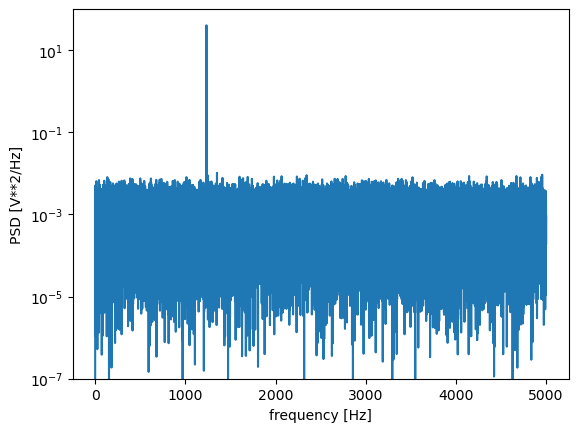

In [86]:
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += rng.normal(scale=np.sqrt(noise_power), size=time.shape)
f, Pxx_den = signal.periodogram(x, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [87]:
##Declaracion de variables fijas
N=1000 # Cantidad de muestras
R=200 # Realizaciones
fs=1000 #Frecuecia de muestreo
a1= np.sqrt(2) #Amplitud de la señal
df=fs/N #rResolucion espectral
tt = np.arange(0,1,1/N).reshape((N,1))# Vector de tiempo de columna 1000x1
tt = np.tile(tt, (1, R)) # Vector de 1000x200
Pn= 1/10 #Potencia de ruido cuantizado con 10 dB
Pn_3= 0.5 #Potencia de ruido cuantizado con 3dB

omega_0=fs/4 # Frecuencia central en Heartz
fr=np.random.uniform(-0.5,0.5,size=(1,R)) # Frecuencia aletearia
omega_1= omega_0 + fr*df #Frecuencia a estimar
valor_omega=np.mean(omega_1)#valor medio de omega_1

xx = a1*np.sin(2*np.pi*omega_1*tt) # Hay que multiplicar por 2pi sino, no queda. Señal limpia

sigma=np.sqrt(Pn) # Potencia de ruido. valor para usar en varianza
nn= np.random.normal(0,sigma,size=(N,R)) # Ruido en 1000x1

sigma_3= np.sqrt(Pn_3) # Potencia de ruido. valor para usar en varianza
nn_3= np.random.normal(0,sigma_3,size=(N,R)) # Ruido en 1000x1


S_10= xx + nn # Señal con ruido de 10dB
S_3= xx + nn_3 # Señal con ruido de 3dB

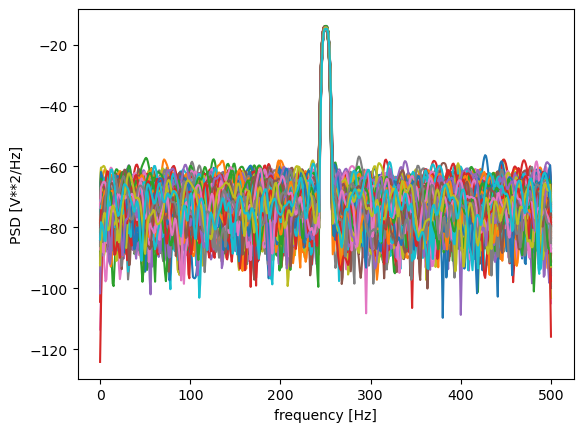

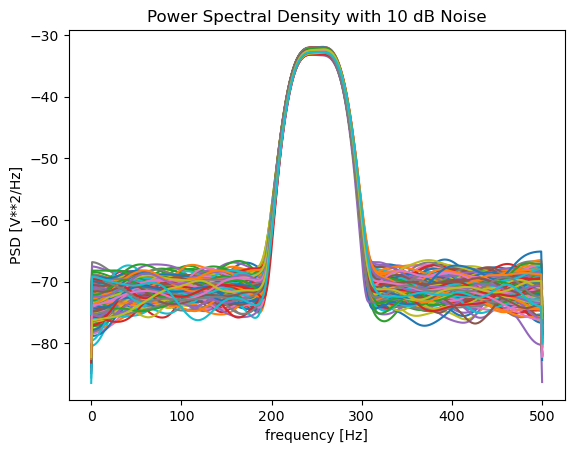

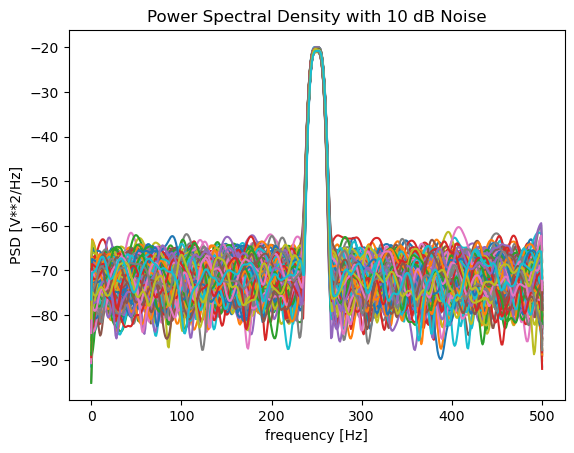

In [88]:
f,Pxx=signal.welch(S_10,fs,nfft=N,window='flattop',nperseg=N/2,axis=0)
plt.figure(1)
ff = np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2
plt.plot(f, 10* np.log10(2*np.abs(Pxx)**2))
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


f_3,Pxx_3=signal.welch(S_10,fs,nfft=N,window='flattop',nperseg=N/16,axis=0)
plt.figure(2)
plt.plot(f_3, 10* np.log10(2*np.abs(Pxx_3)**2))
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.title('Power Spectral Density with 10 dB Noise')
plt.show()

f_4,Pxx_4=signal.welch(S_10,fs,nfft=N,window='flattop',nperseg=N/4,axis=0)
plt.figure(2)
plt.plot(f_4, 10* np.log10(2*np.abs(Pxx_4)**2))
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.title('Power Spectral Density with 10 dB Noise')
plt.show()

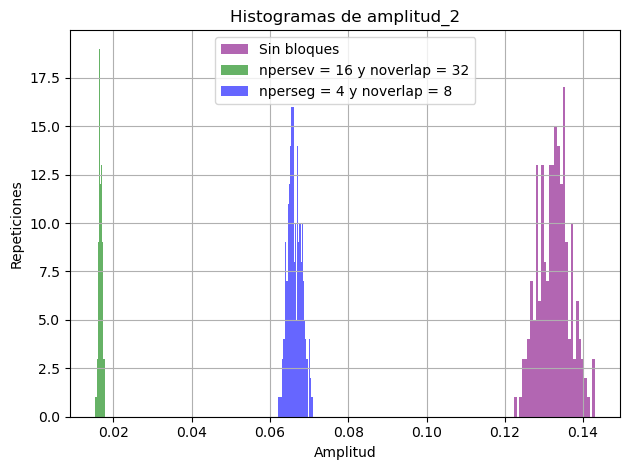

In [89]:
indice=250
a_gorro2_3=Pxx_3[indice]
a_gorro2_2=Pxx_4[indice]
a_gorro2_1=Pxx[indice]

sesgo_1=np.mean(a_gorro2_1) - a1
sesgo_2=np.mean(a_gorro2_2) - a1
sesgo_3=np.mean(a_gorro2_3) - a1

plt.figure(3)
plt.hist(a_gorro2_1, bins=30, label='Sin bloques', color='purple', alpha=0.6)
plt.hist(a_gorro2_3, bins=30, label='npersev = 16 y noverlap = 32', color='green', alpha=0.6)
plt.hist(a_gorro2_2, bins=30, label='nperseg = 4 y noverlap = 8', color='blue', alpha=0.6)
plt.title('Histogramas de amplitud_2')
plt.xlabel('Amplitud')
plt.ylabel('Repeticiones')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

varianza_1=np.var(a_gorro2_1)
varianza_3=np.var(a_gorro2_3)


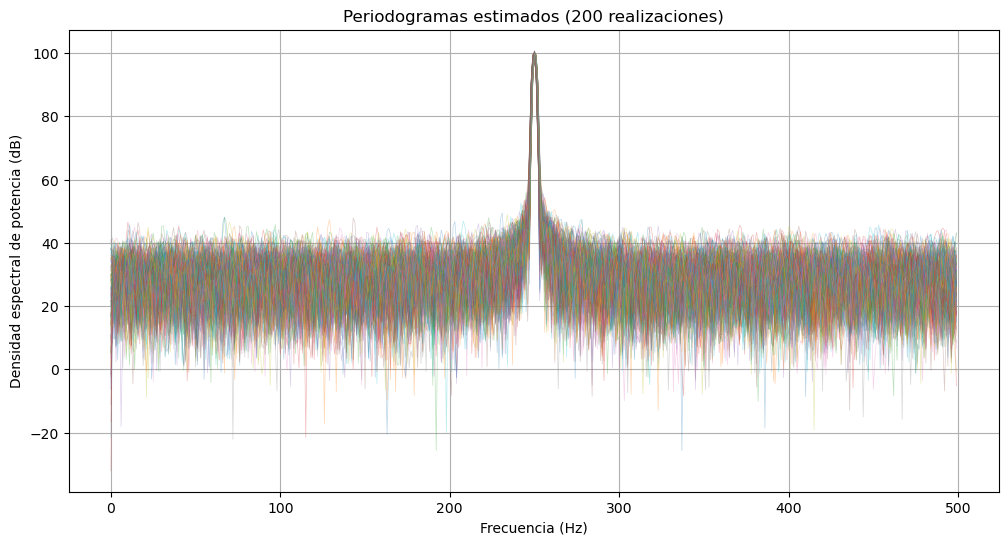

In [ ]:
# Configuración de ventana
L = N // 4  # Tamaño de la ventana = 250
window = get_window('blackman', 2*L + 1)  # Ventana centrada de longitud impar

# Inicializar matriz para PSDs
psd_all = np.zeros((N, M))

# Loop sobre cada realización
for i in range(M):
    xi = x[:, i]

    # Estimar autocorrelación (biased)
    r = np.correlate(xi, xi, mode='full') / N  # longitud = 2N - 1
    mid = len(r) // 2  # índice central

    # Seleccionar lags [-L, ..., L]
    r_limited = r[mid - L: mid + L + 1]  # longitud = 2L + 1 = 251

    # Aplicar ventana
    r_windowed = r_limited * window

    # FFT para obtener la PSD
    psd = np.real(fftshift(fft(r_windowed, n=N)))  # N puntos
    psd_all[:, i] = psd

# Promedio de todas las realizaciones
psd_mean = np.mean(psd_all, axis=1)

# Eje de frecuencias (opcional, si tenés fs)
frequencies = np.linspace(-0.5, 0.5, N, endpoint=False)  # Normalizado

# Plot
plt.figure(figsize=(10, 5))
plt.plot(frequencies, 10 * np.log10(psd_mean), label='Blackman-Tukey PSD')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Densidad espectral (dB)')
plt.title('Estimación PSD - Blackman-Tukey')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()